In [1]:
%load_ext autoreload
%autoreload 2

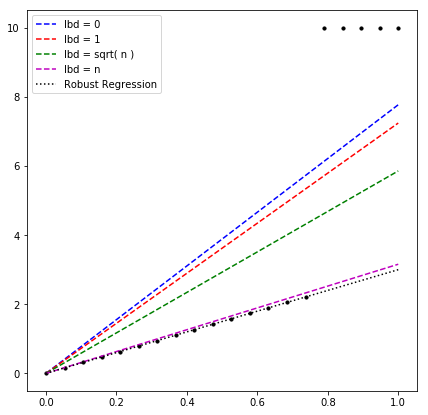

In [71]:
import numpy as np
from numpy import linalg as lin
from numpy import random as rnd
from cs771 import genSyntheticData as gsd
from cs771 import plotData as pd

def linReg( X ):
    return X * wHat

def doRidgeReg( X, y, lbd ):
    return 1/(2 * np.sum( np.square( X ) ) + lbd) * 2 * X.dot( y )

# The following implements a simple algorithm called TORRENT from Bhatia et al NIPS 2015
def doRobReg( X, y, k ):
    horizon = 10
    wHat = 0
    for t in range( horizon ):
        res = np.abs( X * wHat - y )
        idx = np.argsort( res )[0:n-k]
        XClean = X[idx]
        yClean = y[idx]
        wHat = 1/(np.sum( np.square( XClean ) )) * XClean.dot( yClean )
    return wHat

n = 20

X = np.linspace( 0, 1, n, endpoint = True )
wAst = 3
noise = rnd.normal( 0, 0.1, (n,) )
y = X * wAst

numCorrupted = 5
y[-numCorrupted:] = 10

fig = pd.getFigure( 7, 7 )
pd.plot2D( np.hstack( (X[:, np.newaxis], y[:, np.newaxis]) ), fig, color = 'k', marker = 'o', size = 10 )

# Ridge regression utilizes the (squared) L2 regularizer
# If data has noise/corruptions/outliers, the regularizer helps us avoid fitting the model to the noise etc
# However, remember that the regularizer does change the optimization problem and hence, the optimizer will
# not fit the data perfectly if there is a regularizer. This may become a problem if there is overregularization.

lbd = 0
wHat = doRidgeReg( X, y, lbd )
pd.plotCurve( linReg, fig, mode = "batch", color = 'b', line = "--", xlimL = 0, xlimR = 1, label = "lbd = 0" )

lbd = 1
wHat = doRidgeReg( X, y, lbd )
pd.plotCurve( linReg, fig, mode = "batch", color = 'r', line = "--", xlimL = 0, xlimR = 1, label = "lbd = 1" )

lbd = np.sqrt( n )
wHat = doRidgeReg( X, y, lbd )
pd.plotCurve( linReg, fig, mode = "batch", color = 'g', line = "--", xlimL = 0, xlimR = 1, label = "lbd = sqrt( n )" )

lbd = n
wHat = doRidgeReg( X, y, lbd )
pd.plotCurve( linReg, fig, mode = "batch", color = 'm', line = "--", xlimL = 0, xlimR = 1, label = "lbd = n" )

# Robust regression techniques (e.g. using Huber loss or iterative subset selection) can also
# be seen as a form of regularization as they do not try to fit all data points, just clean ones
wHat = doRobReg( X, y, numCorrupted )
pd.plotCurve( linReg, fig, mode = "batch", color = 'k', line = ":", xlimL = 0, xlimR = 1, label = "Robust Regression" )